In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Attempting to manually read text files and process them for the combined dataset

# Read the German-English files
try:
    with open('/content/OpenSubtitles.de-en.de', 'r', encoding='utf-8') as german_file:
        german_sentences = german_file.readlines()

    with open('/content/OpenSubtitles.de-en.en', 'r', encoding='utf-8') as german_english_file:
        english_from_german = german_english_file.readlines()

    # Create German-English DataFrame
    german_english_combined = pd.DataFrame({
        'Source': [line.strip() for line in german_sentences],
        'Target': [line.strip() for line in english_from_german]
    })

except Exception as e:
    german_english_combined = None
    print("Error reading German-English files:", e)

# Read the Spanish-English files
try:
    with open('/content/OpenSubtitles.en-es.es', 'r', encoding='utf-8') as spanish_file:
        spanish_sentences = spanish_file.readlines()

    with open('/content/OpenSubtitles.en-es.en', 'r', encoding='utf-8') as spanish_english_file:
        english_from_spanish = spanish_english_file.readlines()

    # Create Spanish-English DataFrame
    spanish_english_combined = pd.DataFrame({
        'Source': [line.strip() for line in spanish_sentences],
        'Target': [line.strip() for line in english_from_spanish]
    })

except Exception as e:
    spanish_english_combined = None
    print("Error reading Spanish-English files:", e)

# Combine both datasets if successful
if german_english_combined is not None and spanish_english_combined is not None:
    combined_dataset = pd.concat([german_english_combined, spanish_english_combined], ignore_index=True)
    combined_dataset.head()
else:
    combined_dataset = None
    print("Error creating the combined dataset.")

In [1]:

import pandas as pd

# Read German-English files
with open('OpenSubtitles.de-en.de', 'r', encoding='utf-8') as german_file:
    german_sentences = german_file.readlines()

with open('OpenSubtitles.de-en.en', 'r', encoding='utf-8') as german_english_file:
    english_from_german = german_english_file.readlines()

# Create German-English DataFrame
german_english_combined = pd.DataFrame({
    'Source': [line.strip() for line in german_sentences],
    'Target': [line.strip() for line in english_from_german]
})

# Read Spanish-English files
with open('OpenSubtitles.en-es.es', 'r', encoding='utf-8') as spanish_file:
    spanish_sentences = spanish_file.readlines()

with open('OpenSubtitles.en-es.en', 'r', encoding='utf-8') as spanish_english_file:
    english_from_spanish = spanish_english_file.readlines()

# Create Spanish-English DataFrame
spanish_english_combined = pd.DataFrame({
    'Source': [line.strip() for line in spanish_sentences],
    'Target': [line.strip() for line in english_from_spanish]
})

# Combine both datasets
combined_dataset = pd.concat([german_english_combined, spanish_english_combined], ignore_index=True)

# Save combined dataset to a CSV file
combined_dataset.to_csv('combined_dataset.csv', index=False)
print("Combined dataset saved to 'combined_dataset.csv'")

Combined dataset saved to 'combined_dataset.csv'


In [3]:
combined_dataset = pd.read_csv('combined_dataset.csv')
combined_dataset.head()

,Source,Target
0,"Wenn Sie Fahrkarten kaufen wollen, müssen Sie ...","If you want any tickets, you' il have to go ro..."
1,"Na schön, ich denke, dieses Mal wird es gehen.","Well, I suppose it' il be alright."
2,Was mache ich hier eigentlich?,What the hell am I doing around here?
3,Die kommen hier herein und...,They walk in here and...
4,Mal sehen.,Let' s see.


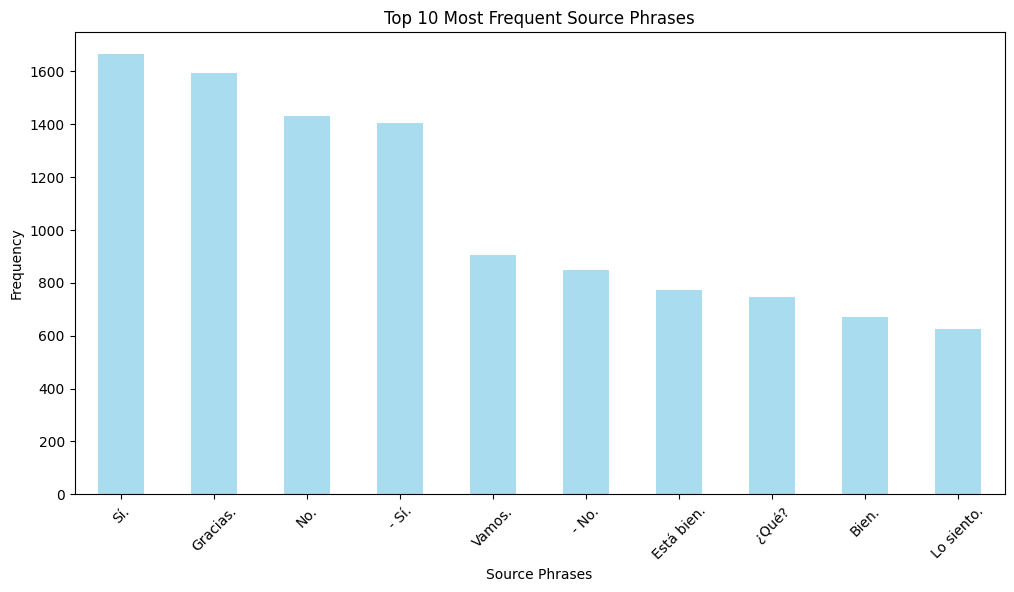

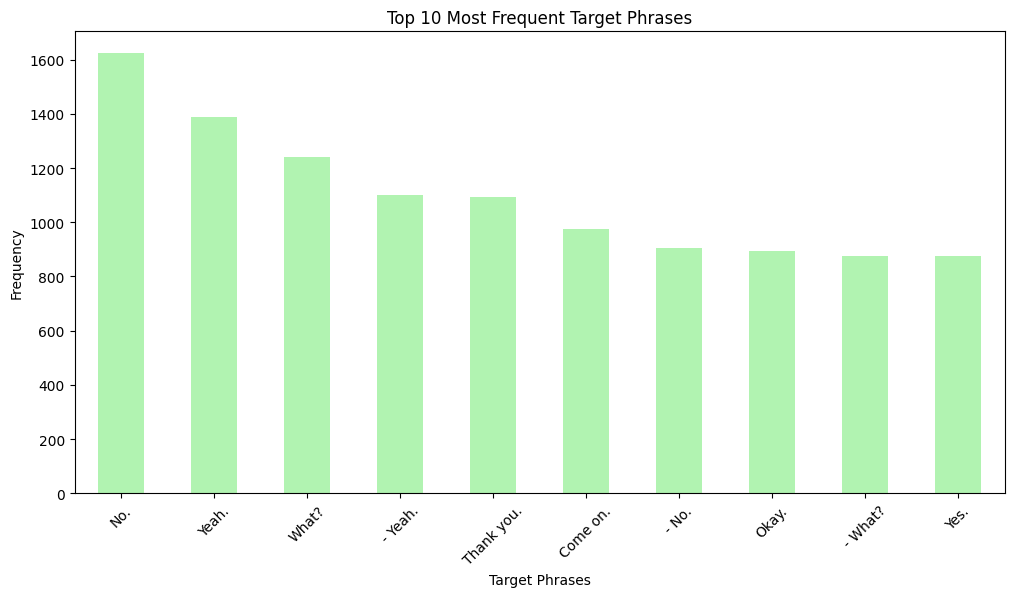

In [4]:
# Bar plot for most frequent phrases
source_top_n = combined_dataset['Source'].value_counts().head(10)
target_top_n = combined_dataset['Target'].value_counts().head(10)

plt.figure(figsize=(12, 6))
source_top_n.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Top 10 Most Frequent Source Phrases")
plt.xlabel("Source Phrases")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
target_top_n.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title("Top 10 Most Frequent Target Phrases")
plt.xlabel("Target Phrases")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

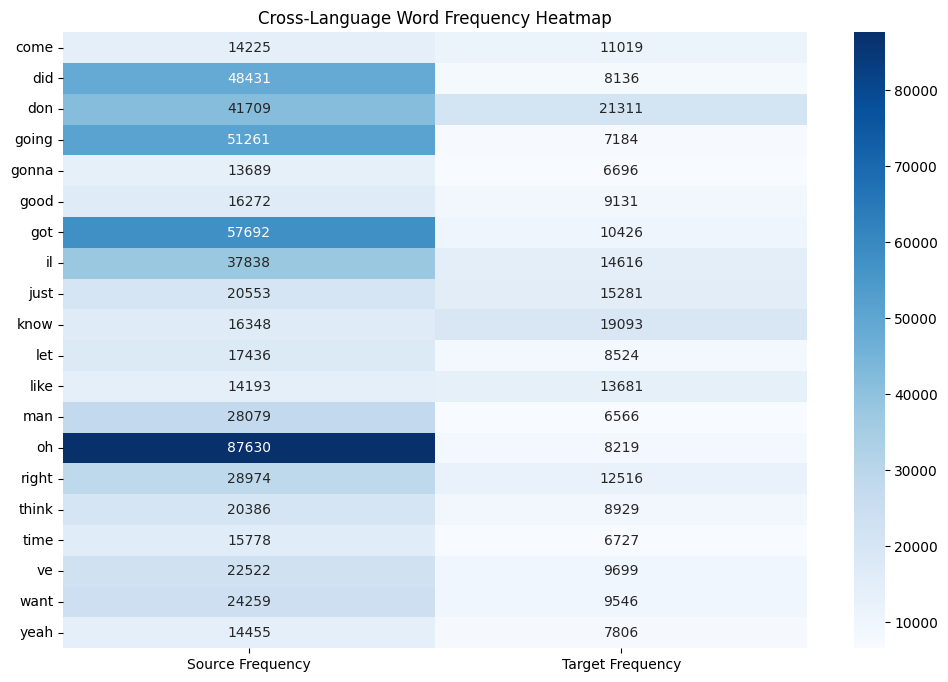

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Extract top words
vectorizer = CountVectorizer(max_features=20, stop_words='english')
source_word_counts = vectorizer.fit_transform(combined_dataset['Source'])
target_word_counts = vectorizer.fit_transform(combined_dataset['Target'])

source_words = vectorizer.get_feature_names_out()
target_words = vectorizer.get_feature_names_out()

# Create a heatmap
word_frequency_matrix = pd.DataFrame({
    "Source Frequency": source_word_counts.toarray().sum(axis=0),
    "Target Frequency": target_word_counts.toarray().sum(axis=0),
}, index=source_words)

plt.figure(figsize=(12, 8))
sns.heatmap(word_frequency_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Cross-Language Word Frequency Heatmap")
plt.show()

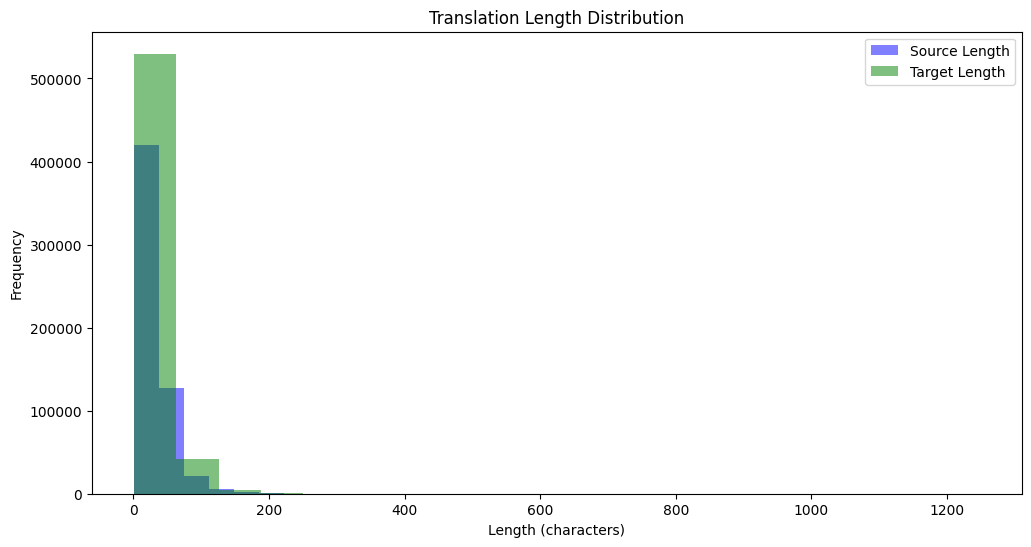

In [6]:
# Translation length comparison
combined_dataset['Source Length'] = combined_dataset['Source'].apply(len)
combined_dataset['Target Length'] = combined_dataset['Target'].apply(len)

plt.figure(figsize=(12, 6))
plt.hist(combined_dataset['Source Length'], bins=20, alpha=0.5, label='Source Length', color='blue')
plt.hist(combined_dataset['Target Length'], bins=20, alpha=0.5, label='Target Length', color='green')
plt.title("Translation Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [7]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
import torch

# Load the mBART model and tokenizer
model_name = "facebook/mbart-large-50-many-to-one-mmt"
model = MBartForConditionalGeneration.from_pretrained(model_name)
tokenizer = MBart50TokenizerFast.from_pretrained(model_name)

# Set the target language to English
tokenizer.src_lang = "de_DE"  # Example: German source language

# Function to translate text
def translate(texts, source_lang):
    tokenizer.src_lang = source_lang  # Set source language
    encoded_inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=50)
    generated_tokens = model.generate(**encoded_inputs)
    translated_texts = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
    return translated_texts

# Example usage
german_texts = ["Hallo Welt", "Wie geht es dir?"]
spanish_texts = ["Hola mundo", "¿Cómo estás?"]

# Translate German to English
print("German to English:", translate(german_texts, "de_DE"))

# Translate Spanish to English
print("Spanish to English:", translate(spanish_texts, "es_XX"))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/268 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

German to English: ['Hello World', 'How are you?']
Spanish to English: ['The Committee recommends that the State party take all necessary measures to ensure the full implementation of the present recommendations, inter alia, by transmitting them to the members of the Council of Ministers, the Parliament, the Parliamentary Assembly, the Parliamentary Assembly of the Council of Ministers, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the Council of Europe, the Parliamentary Assembly of the European Union, the Parliamentary Assembly of 

In [8]:
# Plot Training and Validation Loss
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Training and Validation Accuracy
def plot_accuracy_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize Example Translations
def visualize_translations(test_texts, tokenizer, model, n_samples=5):
    print("\n--- Example Translations ---\n")
    for text in test_texts[:n_samples]:
        translated_text = translate(text, tokenizer, model)
        print(f"Source: {text}")
        print(f"Translated: {translated_text}")
        print("-" * 50)

# Heatmap of Attention Weights (Advanced)
def plot_attention_heatmap(encoder_outputs, attention_weights, input_text, tokenizer):
    input_tokens = tokenizer.tokenize(input_text)
    attention_matrix = np.mean(attention_weights, axis=0)  # Average over heads

    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_matrix[:len(input_tokens), :len(input_tokens)], annot=True, fmt=".2f",
                xticklabels=input_tokens, yticklabels=input_tokens, cmap="Blues")
    plt.title("Attention Heatmap")
    plt.xlabel("Input Tokens")
    plt.ylabel("Input Tokens")
    plt.show()


In [11]:
import pandas as pd
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from sklearn.model_selection import train_test_split

# Load BERT tokenizer and model
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

# Define constants
MAX_LEN = 50
BATCH_SIZE = 16
EPOCHS = 10
LEARNING_RATE = 3e-5
LSTM_UNITS = 512

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [9]:
# Encode sequences function
def encode_sequences(texts, tokenizer, max_len):
    inputs = tokenizer(
        texts,
        max_length=max_len,
        truncation=True,
        padding="max_length",
        return_tensors="tf"
    )
    return inputs["input_ids"], inputs["attention_mask"]

# Load dataset and select a subset
combined_dataset = pd.read_csv("combined_dataset.csv")
subset_size = 10000
subset_indices = combined_dataset.sample(subset_size).index
source_texts = combined_dataset.loc[subset_indices, "Source"].tolist()
target_texts = combined_dataset.loc[subset_indices, "Target"].tolist()

In [ ]:
# Encode source and target sequences
source_input_ids, source_attention_masks = encode_sequences(source_texts, tokenizer, MAX_LEN)
target_input_ids, _ = encode_sequences(target_texts, tokenizer, MAX_LEN)

# Convert tensors to NumPy arrays for train-test split
source_input_ids_np = source_input_ids.numpy()
source_attention_masks_np = source_attention_masks.numpy()
target_input_ids_np = target_input_ids.numpy()

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    source_input_ids_np,
    target_input_ids_np,
    test_size=0.2,
    random_state=42
)

attention_mask_train, attention_mask_test = train_test_split(
    source_attention_masks_np,
    test_size=0.2,
    random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42
)

attention_mask_train, attention_mask_val = train_test_split(
    attention_mask_train,
    test_size=0.2,
    random_state=42
)

In [ ]:
# Create dataset objects
def create_tf_dataset(input_ids, attention_masks, decoder_inputs, decoder_outputs, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(
        ((input_ids, attention_masks, decoder_inputs), decoder_outputs)
    )
    dataset = dataset.shuffle(len(input_ids)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_tf_dataset(
    X_train,
    attention_mask_train,
    y_train[:, :-1],
    y_train[:, 1:],
    BATCH_SIZE
)

test_dataset = create_tf_dataset(
    X_test,
    attention_mask_test,
    y_test[:, :-1],
    y_test[:, 1:],
    BATCH_SIZE
)
val_dataset = create_tf_dataset(
    X_val,
    attention_mask_val,
    y_val[:, :-1],
    y_val[:, 1:],
    BATCH_SIZE
)

In [14]:
class BertTranslator(tf.keras.Model):
    def __init__(self, bert_model, vocab_size, lstm_units, embedding_dim=256):
        super(BertTranslator, self).__init__()
        self.bert = bert_model
        self.encoder_projection = tf.keras.layers.Dense(lstm_units)
        self.decoder_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)
        self.decoder = tf.keras.layers.LSTM(lstm_units, return_sequences=True, return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size, activation="softmax")
        self.pooling_layer = tf.keras.layers.GlobalAveragePooling1D()

    @tf.function
    def call(self, inputs, training=False):
        encoder_input_ids = inputs[0]
        encoder_attention_mask = inputs[1]
        decoder_input_ids = inputs[2]

        # BERT Encoder
        encoder_outputs = self.bert(
            input_ids=encoder_input_ids,
            attention_mask=encoder_attention_mask,
            return_dict=True,
            output_hidden_states=True
        )



        # Project BERT hidden states to match LSTM state size
        projected_state = self.encoder_projection(encoder_outputs.last_hidden_state)

        # Pool the projected state to reduce the sequence dimension
        pooled_state = self.pooling_layer(projected_state)

        # Decoder Inputs
        decoder_inputs_embedded = self.decoder_embedding(decoder_input_ids)

        # LSTM Decoder
        decoder_output, _, _ = self.decoder(
            decoder_inputs_embedded,
            initial_state=[pooled_state, pooled_state]
        )

        # Output Layer
        output = self.dense(decoder_output)
        return output

In [15]:
# Instantiate the model
vocab_size = tokenizer.vocab_size
model = BertTranslator(bert_model, vocab_size, LSTM_UNITS)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Load BERT model without the pooler
bert_model = TFBertModel.from_pretrained(
    model_name, from_pt=True, output_hidden_states=True, output_attentions=False
)

# Freeze the pooler layer
for layer in bert_model.layers:
    if "pooler" in layer.name:
        layer.trainable = False


# Train the Model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS
)

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Epoch 1/10


500/500 [==============================] - 281s 486ms/step - loss: 4.9058 - accuracy: 0.7849 - val_loss: 1.6945 - val_accuracy: 0.7951
Epoch 2/10
500/500 [==============================] - 246s 492ms/step - loss: 1.5398 - accuracy: 0.7924 - val_loss: 1.4410 - val_accuracy: 0.7951
Epoch 3/10
500/500 [==============================] - 246s 492ms/step - loss: 1.3779 - accuracy: 0.7924 - val_loss: 1.3366 - val_accuracy: 0.7951
Epoch 4/10
500/500 [==============================] - 246s 492ms/step - loss: 1.2885 - accuracy: 0.7963 - val_loss: 1.2773 - val_accuracy: 0.8030
Epoch 5/10
500/500 [==============================] - 246s 492ms/step - loss: 1.2330 - accuracy: 0.8136 - val_loss: 1.2417 - val_accuracy: 0.8236
Epoch 6/10
500/500 [==============================] - 246s 492ms/step - loss: 1.1966 - accuracy: 0.8245 - val_loss: 1.2197 - val_accuracy: 0.8257
Epoch 7/10
500/500 [==============================] - 246s 492ms/step - loss: 1.1704 - accuracy: 0.8266 - val_loss: 1.2033 - val_accura

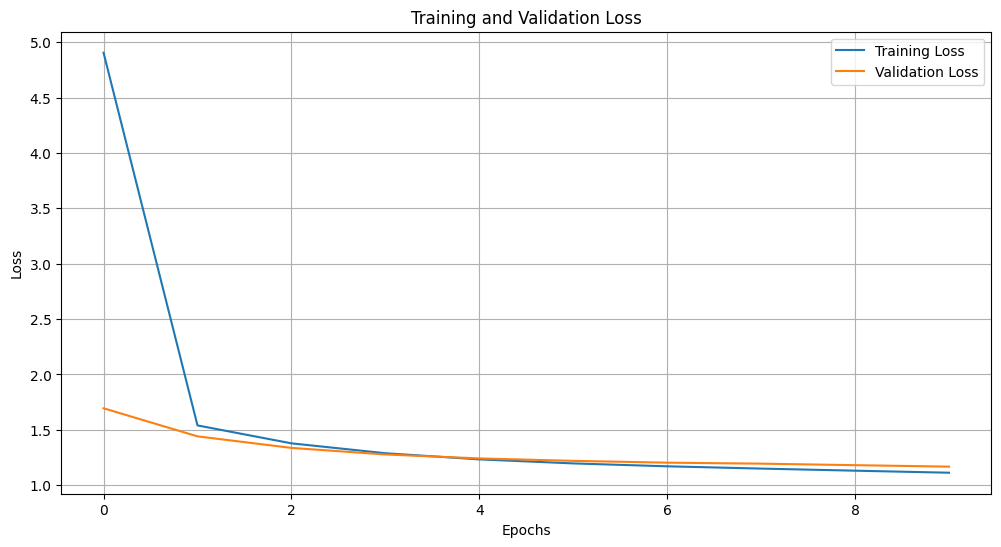

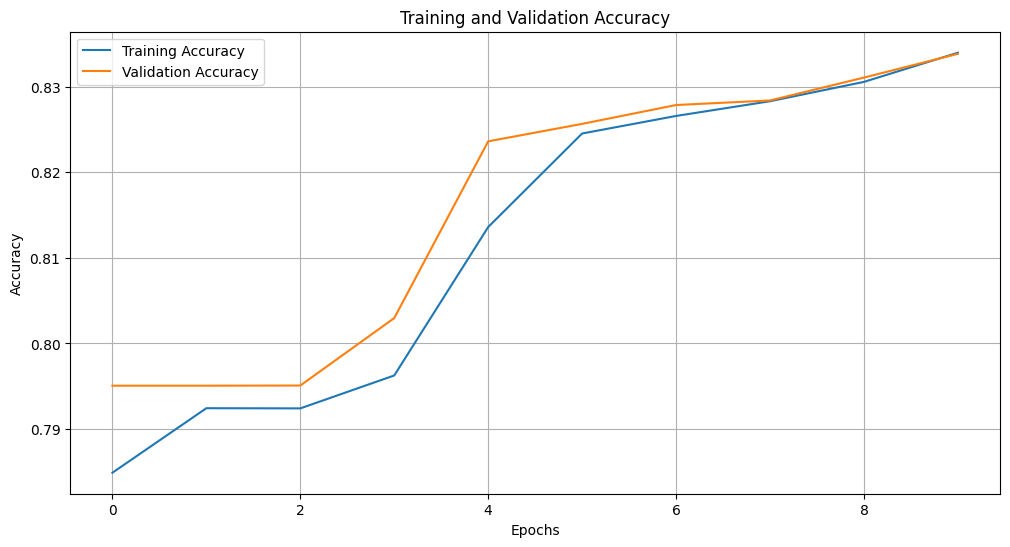

In [17]:
# Visualizing the plots
plot_training_history(history)
plot_accuracy_history(history)
test_accuracy = model.evaluate(test_dataset)

In [18]:
import pandas as pd
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from sklearn.model_selection import train_test_split

# Constants
MAX_LEN = 50
BATCH_SIZE = 16
EPOCHS = 10
LEARNING_RATE = 3e-5
RNN_UNITS = 512

# Load BERT tokenizer and model
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [19]:
# Data Preparation Functions
def encode_sequences(texts, tokenizer, max_len):
    inputs = tokenizer(
        texts,
        max_length=max_len,
        truncation=True,
        padding="max_length",
        return_tensors="tf"
    )
    return inputs["input_ids"], inputs["attention_mask"]

combined_dataset = pd.read_csv("combined_dataset.csv")
reduced_dataset = combined_dataset.sample(frac=0.5, random_state=42)
source_texts = reduced_dataset["Source"].tolist()
target_texts = reduced_dataset["Target"].tolist()

In [ ]:
# Encode source and target sequences
source_input_ids, source_attention_masks = encode_sequences(source_texts, tokenizer, MAX_LEN)
target_input_ids, _ = encode_sequences(target_texts, tokenizer, MAX_LEN)

# Convert tensors to NumPy arrays for train-test split
source_input_ids_np = source_input_ids.numpy()
source_attention_masks_np = source_attention_masks.numpy()
target_input_ids_np = target_input_ids.numpy()

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    source_input_ids_np,
    target_input_ids_np,
    test_size=0.2,
    random_state=42
)

attention_mask_train, attention_mask_test = train_test_split(
    source_attention_masks_np,
    test_size=0.2,
    random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42
)

attention_mask_train, attention_mask_val = train_test_split(
    attention_mask_train,
    test_size=0.2,
    random_state=42
)

# Create TensorFlow Datasets
def create_tf_dataset(input_ids, attention_masks, decoder_inputs, decoder_outputs, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(
        ((input_ids, attention_masks, decoder_inputs), decoder_outputs)
    )
    dataset = dataset.shuffle(len(input_ids)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_tf_dataset(
    X_train,
    attention_mask_train,
    y_train[:, :-1],
    y_train[:, 1:],
    BATCH_SIZE
)

test_dataset = create_tf_dataset(
    X_test,
    attention_mask_test,
    y_test[:, :-1],
    y_test[:, 1:],
    BATCH_SIZE
)
val_dataset = create_tf_dataset(
    X_val,
    attention_mask_val,
    y_val[:, :-1],
    y_val[:, 1:],
    BATCH_SIZE
)

In [21]:
# Define the RNN Translator Model
class RNNTranslator(tf.keras.Model):
    def __init__(self, encoder, vocab_size, embedding_dim=256, rnn_units=512):
        super(RNNTranslator, self).__init__()
        self.encoder = encoder
        self.decoder_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)
        self.decoder = tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True, return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size, activation="softmax")

    def call(self, inputs, training=False):
        encoder_input_ids, encoder_attention_mask, decoder_input_ids = inputs
        encoder_outputs = self.encoder(input_ids=encoder_input_ids, attention_mask=encoder_attention_mask, return_dict=True)
        decoder_inputs_embedded = self.decoder_embedding(decoder_input_ids)
        decoder_output, _ = self.decoder(decoder_inputs_embedded)
        output = self.dense(decoder_output)
        return output

In [22]:
# Instantiate the Model
vocab_size = tokenizer.vocab_size
rnn_model = RNNTranslator(bert_model, vocab_size, rnn_units=RNN_UNITS)

# Compile the Model
rnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Train the Model
rnn_history = rnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS
)

Epoch 1/10


14418/14418 [==============================] - 3727s 258ms/step - loss: 1.3157 - accuracy: 0.8293 - val_loss: 0.9982 - val_accuracy: 0.8474
Epoch 2/10
14418/14418 [==============================] - 3719s 258ms/step - loss: 0.9582 - accuracy: 0.8515 - val_loss: 0.9311 - val_accuracy: 0.8546
Epoch 3/10
14418/14418 [==============================] - 3714s 258ms/step - loss: 0.9084 - accuracy: 0.8564 - val_loss: 0.8975 - val_accuracy: 0.8576
Epoch 4/10
14418/14418 [==============================] - 3714s 258ms/step - loss: 0.8785 - accuracy: 0.8588 - val_loss: 0.8754 - val_accuracy: 0.8595
Epoch 5/10
14418/14418 [==============================] - 3714s 258ms/step - loss: 0.8577 - accuracy: 0.8604 - val_loss: 0.8603 - val_accuracy: 0.8608
Epoch 6/10
14418/14418 [==============================] - 3714s 258ms/step - loss: 0.8420 - accuracy: 0.8617 - val_loss: 0.8488 - val_accuracy: 0.8617
Epoch 7/10
14418/14418 [==============================] - 3717s 258ms/step - loss: 0.8294 - accuracy: 0.8

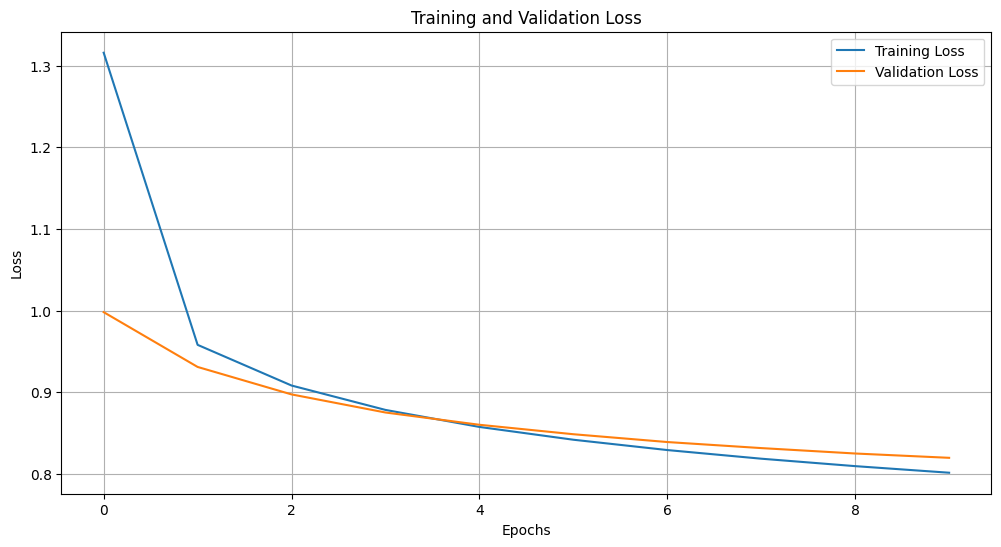

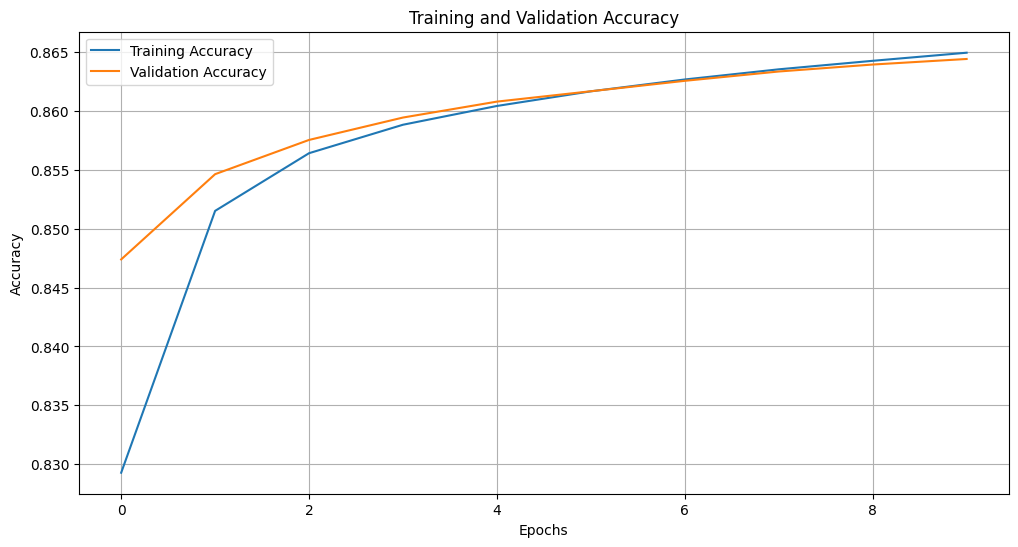

In [24]:
# Visualizing the plots
plot_training_history(rnn_history)
plot_accuracy_history(rnn_history)
test_accuracy = rnn_model.evaluate(test_dataset)

In [25]:
class LSTMTranslator(tf.keras.Model):
    def __init__(self, encoder, vocab_size, embedding_dim=256, lstm_units=512):
        super(LSTMTranslator, self).__init__()
        self.encoder = encoder
        self.decoder_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)
        self.decoder = tf.keras.layers.LSTM(lstm_units, return_sequences=True, return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size, activation="softmax")

    def call(self, inputs, training=False):
        encoder_input_ids, encoder_attention_mask, decoder_input_ids = inputs
        encoder_outputs = self.encoder(input_ids=encoder_input_ids, attention_mask=encoder_attention_mask, return_dict=True)
        decoder_inputs_embedded = self.decoder_embedding(decoder_input_ids)
        decoder_output, _, _ = self.decoder(decoder_inputs_embedded)
        output = self.dense(decoder_output)
        return output

In [26]:
# Instantiate the LSTM Model
lstm_model = LSTMTranslator(bert_model, vocab_size, lstm_units=RNN_UNITS)

# Compile the Model
lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [27]:
import tensorflow as tf

# Clear previous sessions
tf.keras.backend.clear_session()

# Ensure BERT layers are trainable
for layer in bert_model.layers:
    layer.trainable = True

# Recompile the model
lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Subset the dataset
train_subset = train_dataset.take(int(0.5 * len(train_dataset)))
test_subset = test_dataset.take(int(0.5 * len(test_dataset)))

# Train the model
lstm_history = lstm_model.fit(
    train_subset,
    validation_data=test_subset,
    epochs=10
)

Epoch 1/10


7209/7209 [==============================] - 1870s 258ms/step - loss: 1.6520 - accuracy: 0.8083 - val_loss: 1.1210 - val_accuracy: 0.8341
Epoch 2/10
7209/7209 [==============================] - 1862s 258ms/step - loss: 1.0596 - accuracy: 0.8413 - val_loss: 1.0189 - val_accuracy: 0.8458
Epoch 3/10
7209/7209 [==============================] - 1862s 258ms/step - loss: 0.9959 - accuracy: 0.8473 - val_loss: 0.9767 - val_accuracy: 0.8492
Epoch 4/10
7209/7209 [==============================] - 1862s 258ms/step - loss: 0.9654 - accuracy: 0.8501 - val_loss: 0.9564 - val_accuracy: 0.8517
Epoch 5/10
7209/7209 [==============================] - 1862s 258ms/step - loss: 0.9380 - accuracy: 0.8532 - val_loss: 0.9347 - val_accuracy: 0.8537
Epoch 6/10
7209/7209 [==============================] - 1862s 258ms/step - loss: 0.9138 - accuracy: 0.8557 - val_loss: 0.9123 - val_accuracy: 0.8564
Epoch 7/10
7209/7209 [==============================] - 1862s 258ms/step - loss: 0.9013 - accuracy: 0.8565 - val_loss

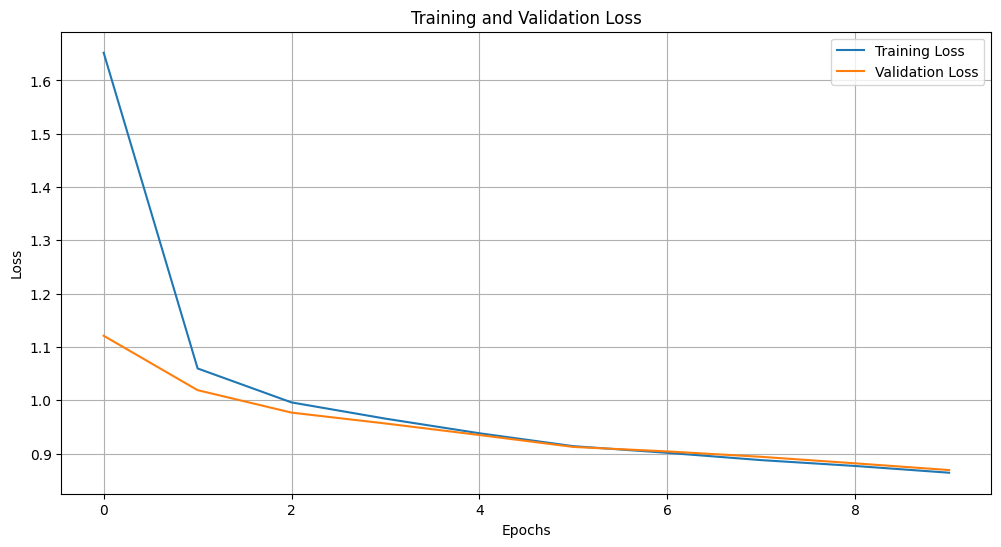

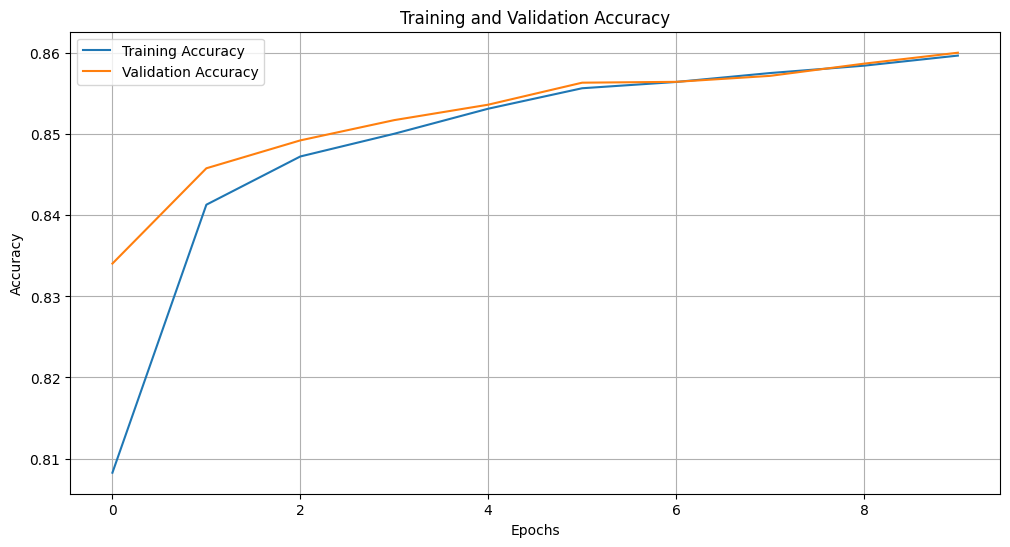

3605/3605 [==============================] - 511s 142ms/step - loss: 0.8745 - accuracy: 0.8593


[0.8745377063751221, 0.8593300580978394]

In [30]:
# Visualizing the plots
plot_training_history(lstm_history)
plot_accuracy_history(lstm_history)
test_accuracy = lstm_model.evaluate(test_dataset)
test_accuracy


#### BERT Model: The Gold Standard for NLP

In [2]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model = "bert-translation-model"
tokenizer = AutoTokenizer.from_pretrained(model)
translation_model = AutoModelForSeq2SeqLM.from_pretrained(model)

# Function to Translate
def test_translation(input_texts, tokenizer, model):
    print("Testing BERT Translation Model...\n")
    results = []
    for text in input_texts:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        outputs = model.generate(**inputs)
        translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
        results.append((text, translation))
        print(f"Input: {text}")
        print(f"Translated: {translation}\n")
    return results

# Example Translations (Spanish and German)
input_examples = [
    # Spanish examples
    "Hola, ¿cómo estás?",       # Hello, how are you?
    "¿Dónde está la biblioteca?",  # Where is the library?
    "Gracias por tu ayuda.",     # Thank you for your help.

    # German examples
    "Wie spät ist es?",          # What time is it?
    "Ich liebe Schokolade.",     # I love chocolate.
    "Kannst du mir helfen?",     # Can you help me?
    "BERT-Modell: Der Goldstandard für NLP"
]

# Perform Translation Testing
translations = test_translation(input_examples, tokenizer, translation_model)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Testing BERT Translation Model...

Input: Hola, ¿cómo estás?
Translated: Hey, how are you?

Input: ¿Dónde está la biblioteca?
Translated: Where's the library?

Input: Gracias por tu ayuda.
Translated: Thanks for your help.

Input: Wie spät ist es?
Translated: What time is it?

Input: Ich liebe Schokolade.
Translated: I love chocolate.

Input: Kannst du mir helfen?
Translated: Can you help me?

Input: BERT-Modell: Der Goldstandard für NLP
Translated: BERT Model: The Gold Standard for NLP



In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model1 = "bert-translation-model"
tokenizer = AutoTokenizer.from_pretrained(model)
translation_model = AutoModelForSeq2SeqLM.from_pretrained(model)

# Function to Translate
def test_translation(input_texts, tokenizer, model):
    print("Testing BERT Translation Model...\n")
    results = []
    for text in input_texts:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        outputs = model.generate(**inputs)
        translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
        results.append((text, translation))
        print(f"Input: {text}")
        print(f"Translated: {translation}\n")
    return results

# Example Translations (Spanish and German)
input_examples = [
    # Spanish examples

    "No tener pelos en la lengua.",

    # German examples
    "Das ist nicht mein Bier"

]

# Perform Translation Testing
translations = test_translation(input_examples, tokenizer, translation_model)

Testing BERT Translation Model...

Input: No tener pelos en la lengua.
Translated: Don't have hair on your tongue.

Input: Das ist nicht mein Bier
Translated: That's not my beer

